In [1]:
#Importação de bibliotacas
import pandas as pd
import numpy as np
import matplotlib as plt
from matplotlib import pyplot as plt
from sklearn.neighbors import NearestNeighbors
from scipy.sparse import csr_matrix
from scipy.sparse import coo_matrix
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import linear_kernel

ModuleNotFoundError: No module named 'pandas'

In [ ]:
# Importando ps CSV com pandas
games =pd.read_csv('./bases/games.csv')
reco = pd.read_csv('./bases/recommendations.csv')
metadata = pd.read_json('./bases/games_metadata.json', lines=True)
users = pd.read_csv('./bases/users.csv')

## Tratamento de dados


In [6]:
#Dropando a coluna STEAM DECK de JOGOS pois todas são TRUE
games.drop(['steam_deck'], axis=1, inplace=True)

In [7]:
#Colocando as colunas em PT_BR
games.columns = ['jogo_id', 'titulo', 'data_lancamento', 'win', 'mac', 'linux','avaliacao','feedback_positivo','qtd_avaliacoes','preco_final','preco_original','desconto']
reco.columns = ['jogo_id', 'util', 'engracado', 'data', 'e_recomendado','horas_jogadas','usuario_id','avaliacao_id']
metadata.columns = ['jogo_id', 'descricao', 'tags']
users.columns = ['usuario_id','qtd_jogos','qtd_avaliacoes']

In [8]:
#Transformando em date, pois está em object
reco['data'] = pd.to_datetime(reco['data'])
games['data_lancamento'] = pd.to_datetime(games['data_lancamento'])

In [13]:
#Transformando object em nuemric
metadata['jogo_id'] = pd.to_numeric(metadata['jogo_id'])
games['qtd_avaliacoes'] = pd.to_numeric(games['qtd_avaliacoes'])
games['preco_final'] = pd.to_numeric(games['preco_final'])
games['jogo_id'] = pd.to_numeric(games['jogo_id'])
reco['jogo_id'] = pd.to_numeric(reco['jogo_id'])
users['usuario_id'] = pd.to_numeric(users['usuario_id'])



In [16]:
#Transformando em String
games['avaliacao'] = games['avaliacao'].astype(pd.StringDtype())
games['titulo'] = games['titulo'].astype(pd.StringDtype())
metadata['descricao'] = metadata['descricao'].astype(pd.StringDtype())
#metadata['tags'] = metadata['tags'].astype("category")

In [17]:
games.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48786 entries, 0 to 48785
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   jogo_id            48786 non-null  int64         
 1   titulo             48786 non-null  string        
 2   data_lancamento    48786 non-null  datetime64[ns]
 3   win                48786 non-null  bool          
 4   mac                48786 non-null  bool          
 5   linux              48786 non-null  bool          
 6   avaliacao          48786 non-null  string        
 7   feedback_positivo  48786 non-null  int64         
 8   qtd_avaliacoes     48786 non-null  int64         
 9   preco_final        48786 non-null  float64       
 10  preco_original     48786 non-null  float64       
 11  desconto           48786 non-null  float64       
dtypes: bool(3), datetime64[ns](1), float64(3), int64(3), string(2)
memory usage: 3.5 MB


In [18]:
metadata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48786 entries, 0 to 48785
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   jogo_id    48786 non-null  int64 
 1   descricao  48786 non-null  string
 2   tags       48786 non-null  object
dtypes: int64(1), object(1), string(1)
memory usage: 1.1+ MB


In [19]:
#Salvando as tabelas em PT_BR
games.to_csv('./bases/jogos.csv', index=False)
reco.to_csv('./bases/avaliacoes.csv', index=False)
users.to_csv('./bases/usuarios.csv', index=False)
metadata.to_json('./bases/jogos_metadata.json',orient='records', lines=True)

In [20]:
metadata

,jogo_id,descricao,tags
0,10090,"Call of Duty is back, redefining war like you'...","[Zombies, World War II, FPS, Multiplayer, Acti..."
1,13500,Enter the dark underworld of Prince of Persia ...,"[Action, Adventure, Parkour, Third Person, Gre..."
2,22364,,[Action]
3,113020,Monaco: What's Yours Is Mine is a single playe...,"[Co-op, Stealth, Indie, Heist, Local Co-Op, St..."
4,226560,Escape Dead Island is a Survival-Mystery adven...,"[Zombies, Adventure, Survival, Action, Third P..."
...,...,...,...
48781,1581480,A unique blend of puzzle-solving and action-pl...,"[Puzzle, Puzzle Platformer, Singleplayer, Casu..."
48782,1964040,"Spy on strangers through security cameras, inv...",[]
48783,1353521,,[]
48784,2311190,Embrace the horrors of Banban’s Kindergarten. ...,[]


In [21]:
games.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48786 entries, 0 to 48785
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   jogo_id            48786 non-null  int64         
 1   titulo             48786 non-null  string        
 2   data_lancamento    48786 non-null  datetime64[ns]
 3   win                48786 non-null  bool          
 4   mac                48786 non-null  bool          
 5   linux              48786 non-null  bool          
 6   avaliacao          48786 non-null  string        
 7   feedback_positivo  48786 non-null  int64         
 8   qtd_avaliacoes     48786 non-null  int64         
 9   preco_final        48786 non-null  float64       
 10  preco_original     48786 non-null  float64       
 11  desconto           48786 non-null  float64       
dtypes: bool(3), datetime64[ns](1), float64(3), int64(3), string(2)
memory usage: 3.5 MB


In [22]:
#Mostra quantidade de dados
pd.DataFrame([
    ["Recomendações", len(reco.index)],
    ["Utilizadores", len(users.index)],
    ["Jogos", len(games.index)],
    ["Metadata_Jogos", len(metadata.index)]
], columns=["Base_Dados", "Registos"])

,Base_Dados,Registos
0,Recomendações,13785712
1,Utilizadores,6916965
2,Jogos,48786
3,Metadata_Jogos,48786


In [23]:
#Calcula o percentual de valores ausentes
def perc_na(df: pd.DataFrame) -> float:
    return np.count_nonzero(df.isnull().values) / (df.shape[0] * df.shape[1]) * 100.0


pd.DataFrame([
    ["Recomendações", perc_na(reco)],
    ["Utilizadores", perc_na(users)],
    ["Jogos", perc_na(games)],
    ["Metadata_Jogos",perc_na(metadata)]
], columns=["Dataframe", "% de valores ausentes"])

,Dataframe,% de valores ausentes
0,Recomendações,0.0
1,Utilizadores,0.0
2,Jogos,0.0
3,Metadata_Jogos,0.0


In [19]:
#Verificando se existe dados duplicados
print('Dados duplicados em Games: ')
print(games.duplicated().sum())
print('\n')
print('Dados duplicados em Users: ')
print(users.duplicated().sum())
print('\n')
print('Dados duplicados em Recomendacoes: ')
print(reco.duplicated().sum())

Dados duplicados em Games: 
0


Dados duplicados em Users: 
0


Dados duplicados em Recomendacoes: 
0


### Recomendações / Relatórios

Quantidade de generos  441
Media de generos parecidos  1297.3265306122448


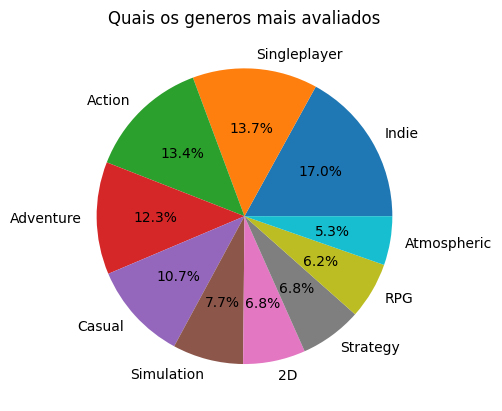

In [24]:
#Mostrar quais categorias de jogos sao os mais avaliados
gamesdf = games.merge(metadata, on='jogo_id')
genres = gamesdf['tags']
count_list = []
for i in genres:
    for j in i:
        count_list.append(j)

sorted_genres = pd.value_counts(np.array(count_list))
sorted_genres = sorted_genres.sort_values(ascending=False)
print("Quantidade de generos ", sorted_genres.size)
print("Media de generos parecidos ", sorted_genres.mean())

# Create a chart to help us see our results
genre_slice = sorted_genres.head(10)
labels = genre_slice.keys()

fig, ax = plt.subplots()
plt.title('Quais os generos mais avaliados')
pchart = ax.pie(genre_slice, labels = labels, autopct='%1.1f%%')

Quantidade de generos  68
Media de generos parecidos  1.911764705882353


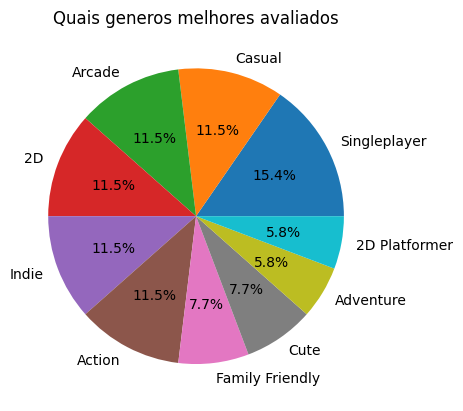

In [7]:
#10 jogos com as críticas mais positivas ajudará a dar uma ideia dos jogos que são quase universalmente adorados pelos jogadores
gamesdf = games.merge(metadata, on='jogo_id')
gamesdf = gamesdf.sort_values('feedback_positivo', ascending=False)
positivedf = gamesdf.head(10)
tags = positivedf['tags']
count_list = []
for i in tags:
    for j in i:
        count_list.append(j)

sorted_tags = pd.value_counts(np.array(count_list))
sorted_tags = sorted_tags.sort_values(ascending=False)
print("Quantidade de generos ", sorted_tags.size)
print("Media de generos parecidos ", sorted_tags.mean())  

# Create a chart to help us see our results
tag_slice = sorted_tags.head(10)
labels = tag_slice.keys()

fig, ax = plt.subplots()
plt.title('Quais generos melhores avaliados')
pchart = ax.pie(tag_slice, labels = labels, autopct='%1.1f%%')

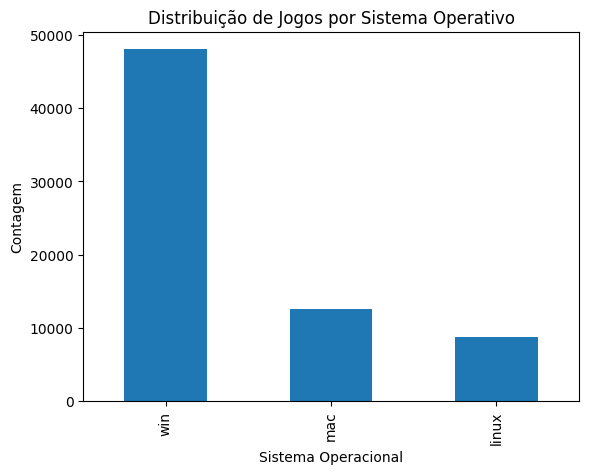

In [108]:
# Contagem de jogos por sistema operacional
count_os = games[['win', 'mac', 'linux']].sum()

# Visualização em um gráfico de barras
count_os.plot(kind='bar')
plt.xlabel('Sistema Operacional')
plt.ylabel('Contagem')
plt.title('Distribuição de Jogos por Sistema Operativo')
plt.show()

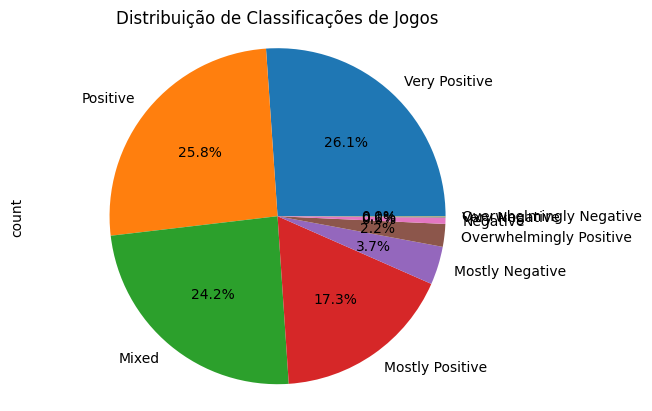

In [ ]:
#Distribuição de classificações
count_ratings = games['avaliacao'].value_counts()

# Visualização em um gráfico de pizza
count_ratings.plot(kind='pie', autopct='%1.1f%%')
plt.axis('equal')
plt.title('Distribuição de Classificações de Jogos')
plt.show()

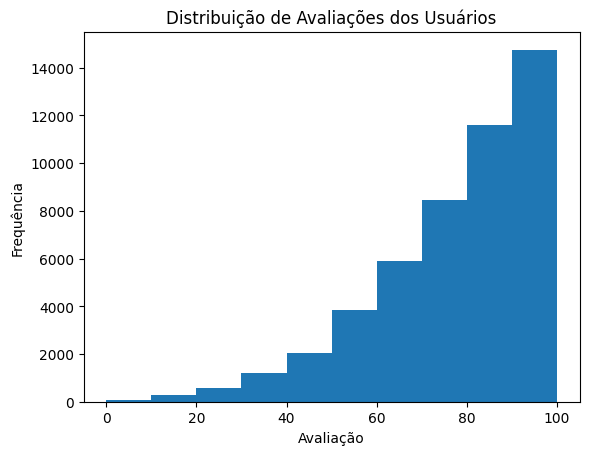

In [ ]:
# Estatísticas descritivas
user_reviews_stats = games[['feedback_positivo', 'qtd_avaliacoes']].describe()

# Histograma das avaliações dos usuários
games['feedback_positivo'].plot(kind='hist', bins=10)
plt.xlabel('Avaliação')
plt.ylabel('Frequência')
plt.title('Distribuição de Avaliações dos Usuários')
plt.show()

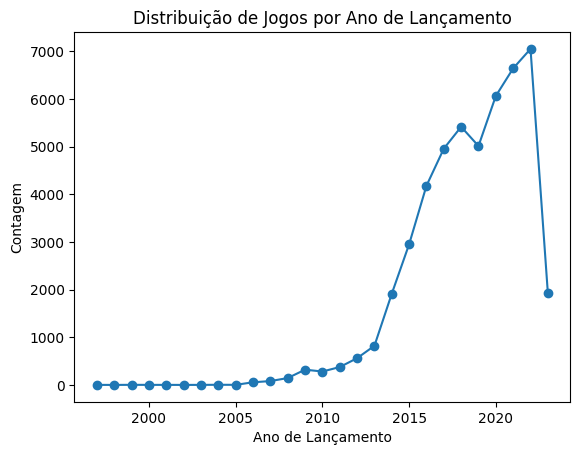

In [ ]:
# Converter a coluna de data_release para o tipo datetime
df = gamesdf.sort_values('data_lancamento')
games['data_lancamento'] = pd.to_datetime(df['data_lancamento'])

# Contagem de jogos por ano de lançamento
count_release_year = games['data_lancamento'].dt.year.value_counts().sort_index()

# Visualização em um gráfico de linha
count_release_year.plot(kind='line', marker='o')
plt.xlabel('Ano de Lançamento')
plt.ylabel('Contagem')
plt.title('Distribuição de Jogos por Ano de Lançamento')
plt.show()

In [18]:
#Top 10 Games Populares 2022, usuarios MAC
game_data3=games.loc[(games['data_lancamento'].dt.year==2022) & (games['feedback_positivo']>=90) & (games['mac']==True)].sort_values(['qtd_avaliacoes','feedback_positivo'],ascending=[False,False]).head(10)
game_data3[['titulo','qtd_avaliacoes','feedback_positivo']]

,titulo,qtd_avaliacoes,feedback_positivo
2671,Vampire Survivors,175903,98
7967,Cult of the Lamb,40135,93
2776,NEEDY STREAMER OVERLOAD,19517,95
18161,20 Minutes Till Dawn,18493,92
4270,The Stanley Parable: Ultra Deluxe,18171,94
17735,Stacklands,16917,96
3823,Rogue Legacy 2,11679,90
10507,Quaver,11567,92
28794,The Looker,10889,97
17416,Soulstone Survivors,8873,91


In [28]:
#Funcao para reduzir o uso de memoria do DF
def reduce_memory(df):
    for col in df.columns:
        if df[col].dtype == 'float64':
            df[col] = df[col].astype('float32')
        if df[col].dtype == 'int64':
            df[col] = df[col].astype('int32')
    return df

# Função geradora para carregar dados em blocos.
def data_generator(df, chunksize=10000):
    for i in range(0, df.shape[0], chunksize):
        yield df.iloc[i:i+chunksize]

In [29]:
#Mapeia cada usuario e item apra a um valor unico numerico
user_ids = reco['usuario_id'].astype('category').cat.codes
item_ids = reco['jogo_id'].astype('category').cat.codes

#Pega o valor unico do jogo e usuario
unique_user_ids = reco['usuario_id'].astype('category').cat.categories
unique_item_ids = reco['jogo_id'].astype('category').cat.categories

#Cria a sparse matrix
user_game_matrix = coo_matrix((reco['horas_jogadas'], (user_ids, item_ids)))

# Ajuda o modelo
model_knn = NearestNeighbors(metric='cosine', algorithm='brute')
model_knn.fit(user_game_matrix)

#Mudar o getrow para mudar o usuario 
# Pega a melhores 5 recomedaçoes para o primeiro usuário
distances, indices = model_knn.kneighbors(user_game_matrix.getrow(0), n_neighbors=6)
recommended_users = [unique_user_ids[i] for i in indices.flatten()[1:]]
print(f'Usuarios recomendados para o primeiro usuario sao: {recommended_users}')

Usuarios recomendados para o primeiro usuario sao: [3123620, 5031804, 1543163, 2829043, 1943227]


In [33]:
import numpy as np

def get_similar_users(user_id, user_game_matrix, model_knn, n_neighbors=6):
    distances, indices = model_knn.kneighbors(user_game_matrix.getrow(user_id), n_neighbors=n_neighbors)
    similar_users = [unique_user_ids[i] for i in indices.flatten()[1:]]
    return similar_users

# Get the unique game ids
unique_game_ids = reco['jogo_id'].astype('category').cat.categories
tf = TfidfVectorizer(analyzer='word', ngram_range=(1, 3), min_df=0, stop_words='english')
tfidf_matrix = tf.fit_transform(games['titulo'])

def get_similar_games(game_id, tfidf_matrix, n_neighbors=6):
    # Find the positional index of the game_id
    game_index = np.where(unique_game_ids == game_id)[0][0]
    
    cosine_similarities = linear_kernel(tfidf_matrix[game_index], tfidf_matrix).flatten()
    similar_indices = cosine_similarities.argsort()[:-n_neighbors:-1]
    similar_games = [games['titulo'].iloc[i] for i in similar_indices]
    return similar_games

def recommend_games(user_id):
    similar_users = get_similar_users(user_id, user_game_matrix, model_knn)
    similar_games = []
    for user in similar_users:
        user_games = reco[reco['usuario_id'] == user]['jogo_id'].unique()
        for game_id in user_games:
            similar_games.extend(get_similar_games(game_id, tfidf_matrix))
    return similar_games

In [43]:
recommend_games(48069)

['Ghost 1.0',
 'This is a Ghost',
 'The Ghost of You',
 'Ghost',
 'The Hidden Ghost',
 'Ghost 1.0',
 'This is a Ghost',
 'The Ghost of You',
 'Ghost',
 'The Hidden Ghost',
 'Ghost 1.0',
 'This is a Ghost',
 'The Ghost of You',
 'Ghost',
 'The Hidden Ghost',
 'Ghost 1.0',
 'This is a Ghost',
 'The Ghost of You',
 'Ghost',
 'The Hidden Ghost',
 'Ghost 1.0',
 'This is a Ghost',
 'The Ghost of You',
 'Ghost',
 'The Hidden Ghost']

In [159]:
#10 Jogos mais populares de 2022 com Avaliações Positivias
game_data1=games.loc[(games['data_lancamento'].dt.year==2022) & (games['feedback_positivo']>=90)].sort_values(['qtd_avaliacoes','feedback_positivo'],ascending=[False,False]).head(10)
game_data1[['titulo','qtd_avaliacoes','feedback_positivo']]

,titulo,qtd_avaliacoes,feedback_positivo
9229,ELDEN RING,481754,91
3594,Raft,218598,93
2671,Vampire Survivors,175903,98
1354,Stray,101109,97
6590,God of War,65968,97
13122,Teardown,60815,96
12170,Marvel’s Spider-Man Remastered,41232,96
7967,Cult of the Lamb,40135,93
8310,PowerWash Simulator,29465,97
10734,LEGO® Star Wars™: The Skywalker Saga,28451,92


In [160]:
#Os 10 jogos mais populares de 2023 com críticas mistas ou baixa
game_data2=games.loc[(games['data_lancamento'].dt.year==2023) & (games['feedback_positivo']<49)].sort_values(['qtd_avaliacoes','feedback_positivo'],ascending=[False,True]).head(10)
game_data2[['titulo','qtd_avaliacoes','feedback_positivo']]

,titulo,qtd_avaliacoes,feedback_positivo
47416,Wo Long: Fallen Dynasty,16048,47
44587,江湖十一,4772,36
36412,Garten of Banban,2909,48
23955,O2Jam Online,1689,17
14292,WILD HEARTS™,1644,32
39942,Squad - Free Recruit Pack,1271,27
46275,Uncharted Waters Origin,1014,40
46287,Dead by Daylight - Tools of Torment Chapter,867,38
46353,Forza Horizon 5 Rally Adventure,849,29
26191,Blood Bowl 3,761,27


In [161]:
#Top 10 Games Populares 2023, usuarios Windows
game_data3=games.loc[(games['data_lancamento'].dt.year==2023) & (games['feedback_positivo']>=90) & (games['win']==True)].sort_values(['qtd_avaliacoes','feedback_positivo'],ascending=[False,False]).head(10)
game_data3[['titulo','qtd_avaliacoes','feedback_positivo']]

,titulo,qtd_avaliacoes,feedback_positivo
12022,Hogwarts Legacy,84327,93
48069,Resident Evil 4,43097,97
19138,Dead Space,18324,92
8080,觅长生,15559,92
47824,The Murder of Sonic the Hedgehog,13564,98
47114,Pineapple on pizza,12588,98
8112,Hi-Fi RUSH,9400,98
42225,东北之夏,8739,98
46984,DREDGE,6417,95
10538,Luck be a Landlord,6404,93


## Informações sobre as DataFrames

#### Metadata Jogos

In [ ]:
metadata.columns
metadata.shape
metadata.dtypes
metadata.describe()
metadata.info()
metadata.head(20)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48786 entries, 0 to 48785
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   jogo_id    48786 non-null  int64 
 1   descricao  48786 non-null  object
 2   tags       48786 non-null  object
dtypes: int64(1), object(2)
memory usage: 1.1+ MB


,jogo_id,descricao,tags
0,10090,"Call of Duty is back, redefining war like you'...","[Zombies, World War II, FPS, Multiplayer, Acti..."
1,13500,Enter the dark underworld of Prince of Persia ...,"[Action, Adventure, Parkour, Third Person, Gre..."
2,22364,,[Action]
3,113020,Monaco: What's Yours Is Mine is a single playe...,"[Co-op, Stealth, Indie, Heist, Local Co-Op, St..."
4,226560,Escape Dead Island is a Survival-Mystery adven...,"[Zombies, Adventure, Survival, Action, Third P..."
5,249050,Dungeon of the Endless is a Rogue-Like Dungeon...,"[Roguelike, Strategy, Tower Defense, Pixel Gra..."
6,250180,"“METAL SLUG 3”, the masterpiece in SNK’s emble...","[Arcade, Classic, Action, Co-op, Side Scroller..."
7,253980,Experience incredibly atmospheric and intense ...,"[RPG, Action, Fantasy, Third Person, Hack and ..."
8,261550,"A strategy/action RPG. Create a character, eng...","[Medieval, Strategy, Open World, RPG, War, Mul..."
9,271850,,"[Strategy, Simulation, Action, RTS, World War II]"


In [ ]:
metadata.info

<bound method DataFrame.info of         app_id                                        description  \
0        10090  Call of Duty is back, redefining war like you'...   
1        13500  Enter the dark underworld of Prince of Persia ...   
2        22364                                                      
3       113020  Monaco: What's Yours Is Mine is a single playe...   
4       226560  Escape Dead Island is a Survival-Mystery adven...   
...        ...                                                ...   
48781  1581480  A unique blend of puzzle-solving and action-pl...   
48782  1964040  Spy on strangers through security cameras, inv...   
48783  1353521                                                      
48784  2311190  Embrace the horrors of Banban’s Kindergarten. ...   
48785  2348170  Desperate to end a bloody war, the Seven Shiel...   

                                                    tags  Zombies  \
0      [Zombies, World War II, FPS, Multiplayer, Acti...     True   
1

#### Jogos

In [ ]:
#Mostra os dados da tabela GAMES
games

,jogo_id,titulo,data_lancamento,win,mac,linux,avaliacao,feedback_positivo,qtd_avaliacoes,preco_final,preco_original,desconto
0,10090,Call of Duty: World at War,2008-11-18,True,False,False,Very Positive,92,37039,19.99,19.99,0.0
1,13500,Prince of Persia: Warrior Within™,2008-11-21,True,False,False,Very Positive,84,2199,9.99,9.99,0.0
2,22364,BRINK: Agents of Change,2011-08-03,True,False,False,Positive,85,21,2.99,2.99,0.0
3,113020,Monaco: What's Yours Is Mine,2013-04-24,True,True,True,Very Positive,92,3722,14.99,14.99,0.0
4,226560,Escape Dead Island,2014-11-18,True,False,False,Mixed,61,873,14.99,14.99,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
48781,1581480,Humanity,2023-05-15,True,False,False,Very Positive,94,106,29.99,29.99,0.0
48782,1964040,Do Not Feed the Monkeys 2099,2023-05-25,True,True,False,Positive,95,21,12.74,14.99,15.0
48783,1353521,Brawlhalla: Battle Pass Classic 2: Synthwave R...,2020-09-17,True,True,False,Very Positive,93,165,9.99,9.99,0.0
48784,2311190,Garten of Banban 3,2023-05-05,True,False,False,Mostly Positive,70,1225,4.99,4.99,0.0


In [ ]:
#Verificando se existe dado faltants
games.isna().sum()


app_id            0
title             0
date_release      0
win               0
mac               0
linux             0
rating            0
positive_ratio    0
user_reviews      0
price_final       0
price_original    0
discount          0
steam_deck        0
dtype: int64

#### Usuários

In [ ]:
users.head()

,user_id,products,reviews
0,6777514,156,1
1,4266577,329,4
2,2295272,176,2
3,2474867,98,2
4,2743202,144,3


In [ ]:
#Verificando se existe dado faltants
users.isna().sum()

user_id     0
products    0
reviews     0
dtype: int64

#### Avaliações

In [78]:
#Mostra o começo da tabela de recomendações
reco.head()

,jogo_id,util,engracado,data,e_recomendado,horas_jogadas,usuario_id,recomendacao_id
0,975370,0,0,2022-12-12,True,36.3,23653,0
1,304390,4,0,2017-02-17,False,11.5,1306,1
2,1085660,2,0,2019-11-17,True,336.5,107856,2
3,703080,0,0,2022-09-23,True,27.4,110044,3
4,526870,0,0,2021-01-10,True,7.9,10805,4


In [ ]:
# Verificando as dimensões do DataFrame
print("Dimensoes: ")
print(reco.shape)
print("\n")

# Obtendo informações sobre as colunas
print("Informacoes: ")
print(reco.info())
print("\n")

# Sumarizando estatísticas descritivas das colunas numéricas
print("Descricao: ")
print(reco.describe())



Dimensoes: 
(13785712, 8)


Informacoes: 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13785712 entries, 0 to 13785711
Data columns (total 8 columns):
 #   Column          Dtype  
---  ------          -----  
 0   app_id          int64  
 1   helpful         int64  
 2   funny           int64  
 3   date            object 
 4   is_recommended  bool   
 5   hours           float64
 6   user_id         int64  
 7   review_id       int64  
dtypes: bool(1), float64(1), int64(5), object(1)
memory usage: 749.4+ MB
None


Descricao: 
             app_id       helpful         funny         hours       user_id  \
count  1.378571e+07  1.378571e+07  1.378571e+07  1.378571e+07  1.378571e+07   
mean   6.097507e+05  3.365137e+00  1.132485e+00  1.415836e+02  3.568277e+06   
std    4.743089e+05  5.753045e+01  3.882386e+01  2.045976e+02  1.975096e+06   
min    1.000000e+01  0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00   
25%    2.615500e+05  0.000000e+00  0.000000e+00  1.580000e+01  1.93

In [ ]:
#Verificando se existe dado faltants
reco.isna().sum()

app_id            0
helpful           0
funny             0
date              0
is_recommended    0
hours             0
user_id           0
review_id         0
dtype: int64

#### Junção Recomendações e usuário

In [ ]:
Rev_user = pd.merge(reco,users,on='usuario_id')

In [ ]:
Rev_user

,jogo_id,utilizavel,engracado,data,e_recomendado,horas_jogadas,usuario_id,recomendacao_id,qtd_jogos,qtd_avaliacoes
0,975370,0,0,2022-12-12,True,36.3,23653,0,28,3
1,1817190,0,0,2022-11-27,True,32.2,23653,970989,28,3
2,1649080,0,0,2022-08-20,True,92.6,23653,8484108,28,3
3,304390,4,0,2017-02-17,False,11.5,1306,1,269,1
4,1085660,2,0,2019-11-17,True,336.5,107856,2,237,2
...,...,...,...,...,...,...,...,...,...,...
13785707,761830,0,0,2021-03-25,True,196.9,540661,13785684,362,1
13785708,683320,0,0,2021-11-07,True,3.6,6533142,13785686,138,1
13785709,683320,0,0,2021-02-21,True,5.5,581926,13785690,15,1
13785710,683320,0,0,2020-12-11,True,5.2,3115830,13785694,192,1


## Filtragem dados


In [44]:
# Importando ps CSV com pandas ( COM AS NOVAS TABELAS)
jogos = pd.read_csv('./bases/jogos.csv')
ava = pd.read_csv('./bases/avaliacoes.csv')
mdjogos = pd.read_json('./bases/jogos_metadata.json', lines=True)
usuarios = pd.read_csv('./bases/usuarios.csv')

In [45]:
mdjogos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48786 entries, 0 to 48785
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   jogo_id    48786 non-null  int64 
 1   descricao  48786 non-null  object
 2   tags       48786 non-null  object
dtypes: int64(1), object(2)
memory usage: 1.1+ MB


#### Filtragem por data

In [46]:
#Filtragem avaliacoes por data [01/12 a 14/12]
df_avl_dezembro_2022 = ava.loc[ava["data"].between("2022-12-01", "2022-12-14")]


In [47]:
df_avl_dezembro_2022.columns = ['jogo_id', 'util', 'engracado', 'data', 'e_recomendado','horas_jogadas','usuario_id','avaliacao_id']

In [48]:
#Transofrmando data em datatype
df_avl_dezembro_2022['data'] = pd.to_datetime(df_avl_dezembro_2022['data'])

C:\Users\jpa\AppData\Local\Temp\ipykernel_8032\71949274.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_avl_dezembro_2022['data'] = pd.to_datetime(df_avl_dezembro_2022['data'])


In [49]:
#Colocando os index em ordem
df_avl_dezembro_2022.reset_index(drop=True, inplace=True)

In [50]:
#Transformando object em datetime
df_avl_dezembro_2022['data'] = pd.to_datetime(df_avl_dezembro_2022['data'])

C:\Users\jpa\AppData\Local\Temp\ipykernel_8032\3418959968.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_avl_dezembro_2022['data'] = pd.to_datetime(df_avl_dezembro_2022['data'])


In [51]:
df_avl_dezembro_2022.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 192727 entries, 0 to 192726
Data columns (total 8 columns):
 #   Column         Non-Null Count   Dtype         
---  ------         --------------   -----         
 0   jogo_id        192727 non-null  int64         
 1   util           192727 non-null  int64         
 2   engracado      192727 non-null  int64         
 3   data           192727 non-null  datetime64[ns]
 4   e_recomendado  192727 non-null  bool          
 5   horas_jogadas  192727 non-null  float64       
 6   usuario_id     192727 non-null  int64         
 7   avaliacao_id   192727 non-null  int64         
dtypes: bool(1), datetime64[ns](1), float64(1), int64(5)
memory usage: 10.5 MB


In [52]:
#Salvando a tabela de dados de avalicações por data
df_avl_dezembro_2022.to_csv('./bases/avaliacoes_tratado.csv', index=False)

In [53]:
#Selecao usuarios dz 2022
selecao_usuarios_dz_2022 = usuarios.loc[usuarios['usuario_id'].isin(df_avl_dezembro_2022['usuario_id'])]



In [54]:
selecao_usuarios_dz_2022.sum(axis=1)

11         5314819
89         5461021
109        6280672
125         726394
227        3694071
            ...   
6916860    2302694
6916865    2304626
6916871    2308558
6916877    2310080
6916880    2310373
Length: 178573, dtype: int64

In [55]:
#Colocando os index em ordem
selecao_usuarios_dz_2022.reset_index(drop=True, inplace=True)

In [56]:
selecao_usuarios_dz_2022.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178573 entries, 0 to 178572
Data columns (total 3 columns):
 #   Column          Non-Null Count   Dtype
---  ------          --------------   -----
 0   usuario_id      178573 non-null  int64
 1   qtd_jogos       178573 non-null  int64
 2   qtd_avaliacoes  178573 non-null  int64
dtypes: int64(3)
memory usage: 4.1 MB


In [57]:
#Salvando usuarios dz 2022
selecao_usuarios_dz_2022.to_csv('./bases/usuarios_tratado.csv', index=False)

In [58]:
#Selecao jogos 2022
selecao_jogos_dz_2022 = jogos.loc[jogos['jogo_id'].isin(df_avl_dezembro_2022['jogo_id'])]

In [59]:
#Colocando os index em ordem
selecao_jogos_dz_2022.reset_index(drop=True, inplace=True)

In [60]:
#Transformando object em datetime
selecao_jogos_dz_2022['data_lancamento'] = pd.to_datetime(selecao_jogos_dz_2022['data_lancamento'])

C:\Users\jpa\AppData\Local\Temp\ipykernel_8032\3638209389.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  selecao_jogos_dz_2022['data_lancamento'] = pd.to_datetime(selecao_jogos_dz_2022['data_lancamento'])


In [61]:
#Transformando em String
selecao_jogos_dz_2022['avaliacao'] = selecao_jogos_dz_2022['avaliacao'].astype(pd.StringDtype())
selecao_jogos_dz_2022['titulo'] = selecao_jogos_dz_2022['titulo'].astype(pd.StringDtype())

C:\Users\jpa\AppData\Local\Temp\ipykernel_8032\3768659331.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  selecao_jogos_dz_2022['avaliacao'] = selecao_jogos_dz_2022['avaliacao'].astype(pd.StringDtype())
C:\Users\jpa\AppData\Local\Temp\ipykernel_8032\3768659331.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  selecao_jogos_dz_2022['titulo'] = selecao_jogos_dz_2022['titulo'].astype(pd.StringDtype())


In [62]:
selecao_jogos_dz_2022.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1880 entries, 0 to 1879
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   jogo_id            1880 non-null   int64         
 1   titulo             1880 non-null   string        
 2   data_lancamento    1880 non-null   datetime64[ns]
 3   win                1880 non-null   bool          
 4   mac                1880 non-null   bool          
 5   linux              1880 non-null   bool          
 6   avaliacao          1880 non-null   string        
 7   feedback_positivo  1880 non-null   int64         
 8   qtd_avaliacoes     1880 non-null   int64         
 9   preco_final        1880 non-null   float64       
 10  preco_original     1880 non-null   float64       
 11  desconto           1880 non-null   float64       
dtypes: bool(3), datetime64[ns](1), float64(3), int64(3), string(2)
memory usage: 137.8 KB


In [63]:
selecao_jogos_dz_2022

,jogo_id,titulo,data_lancamento,win,mac,linux,avaliacao,feedback_positivo,qtd_avaliacoes,preco_final,preco_original,desconto
0,10090,Call of Duty: World at War,2008-11-18,True,False,False,Very Positive,92,37039,19.99,19.99,0.0
1,13500,Prince of Persia: Warrior Within™,2008-11-21,True,False,False,Very Positive,84,2199,9.99,9.99,0.0
2,113020,Monaco: What's Yours Is Mine,2013-04-24,True,True,True,Very Positive,92,3722,14.99,14.99,0.0
3,226560,Escape Dead Island,2014-11-18,True,False,False,Mixed,61,873,14.99,14.99,0.0
4,250180,METAL SLUG 3,2015-09-14,True,False,False,Very Positive,90,5579,7.99,7.99,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
1875,1484280,Demeo,2022-12-15,True,False,False,Very Positive,92,1188,39.99,39.99,0.0
1876,15390,Brothers in Arms: Hell's Highway™,2008-10-08,True,False,False,Very Positive,90,1597,9.99,9.99,0.0
1877,1012880,60 Seconds! Reatomized,2019-07-25,True,True,False,Very Positive,93,9496,9.99,9.99,0.0
1878,440880,The Count Lucanor,2016-03-03,True,True,True,Overwhelmingly Positive,95,1655,9.99,9.99,0.0


In [64]:
selecao_jogos_dz_2022.to_csv('./bases/jogos_tratado.csv', index=False)


In [65]:
#Selecao metadata jogos
selecao_metadata_dz_2022 = mdjogos.loc[mdjogos['jogo_id'].isin(df_avl_dezembro_2022['jogo_id'])]

In [109]:
#Colocando os index em ordem
selecao_metadata_dz_2022.reset_index(drop=True, inplace=True)

In [68]:
selecao_metadata_dz_2022.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1880 entries, 0 to 45196
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   jogo_id    1880 non-null   int64 
 1   descricao  1880 non-null   string
 2   tags       1880 non-null   object
dtypes: int64(1), object(1), string(1)
memory usage: 58.8+ KB


In [67]:
#Transformando em String
selecao_metadata_dz_2022['descricao'] = selecao_metadata_dz_2022['descricao'].astype(pd.StringDtype())


C:\Users\jpa\AppData\Local\Temp\ipykernel_8032\818118179.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  selecao_metadata_dz_2022['descricao'] = selecao_metadata_dz_2022['descricao'].astype(pd.StringDtype())


In [69]:
selecao_metadata_dz_2022.to_json('./bases/jogos_metadata_tratado.json',orient='records', lines=True)

In [81]:
#Juntando o metadata com jogos
jogos_cm_meta_tratado = selecao_jogos_dz_2022.merge(selecao_metadata_dz_2022, on='jogo_id')
jogos_cm_meta_tratado.to_csv('./bases/jogos_com_meta_tratado.csv', index=False)

### Informações dos dados filtrados


In [71]:
#Mostra quantidade de dados
pd.DataFrame([
    ["Avaliacoes DEZ 2022", len(df_avl_dezembro_2022.index)],
    ["Utilizadores  DEZ 2022", len(selecao_usuarios_dz_2022.index)],
    ["Jogos  DEZ 2022", len(selecao_jogos_dz_2022.index)]
], columns=["Base_Dados", "Registos"])

,Base_Dados,Registos
0,Avaliacoes DEZ 2022,192727
1,Utilizadores DEZ 2022,178573
2,Jogos DEZ 2022,1880


In [40]:
#Calcula o percentual de valores ausentes
def perc_na(df: pd.DataFrame) -> float:
    return np.count_nonzero(df.isnull().values) / (df.shape[0] * df.shape[1]) * 100.0


pd.DataFrame([
    ["Avaliacoes 12/2022", perc_na(df_avl_dezembro_2022)],
    ["Usuarios 12/2022 ", perc_na(selecao_usuarios_dz_2022)],
    ["Jogos 12/2022",perc_na(selecao_jogos_dz_2022)]
], columns=["Dataframe", "% de valores ausentes"])

,Dataframe,% de valores ausentes
0,Avaliacoes 12/2022,0.0
1,Usuarios 12/2022,0.0
2,Jogos 12/2022,0.0


### Recomendações  dados filtrados

In [41]:
metadata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48786 entries, 0 to 48785
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   jogo_id    48786 non-null  int64 
 1   descricao  48786 non-null  object
 2   tags       48786 non-null  object
dtypes: int64(1), object(2)
memory usage: 1.1+ MB


Quantidade de generos  425
Media de generos parecidos  81.21176470588236


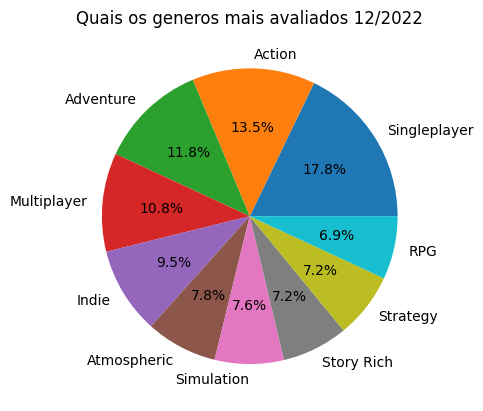

In [74]:
#Mostrar quais categorias de jogos sao os mais avaliados
gamesdf = selecao_jogos_dz_2022.merge(selecao_metadata_dz_2022, on='jogo_id')
genres = gamesdf['tags']
count_list = []
for i in genres:
    for j in i:
        count_list.append(j)

sorted_genres = pd.value_counts(np.array(count_list))
sorted_genres = sorted_genres.sort_values(ascending=False)
print("Quantidade de generos ", sorted_genres.size)
print("Media de generos parecidos ", sorted_genres.mean())

# Create a chart to help us see our results
genre_slice = sorted_genres.head(10)
labels = genre_slice.keys()

fig, ax = plt.subplots()
plt.title('Quais os generos mais avaliados 12/2022')
pchart = ax.pie(genre_slice, labels = labels, autopct='%1.1f%%')

Quantidade de generos  103
Media de generos parecidos  1.6990291262135921


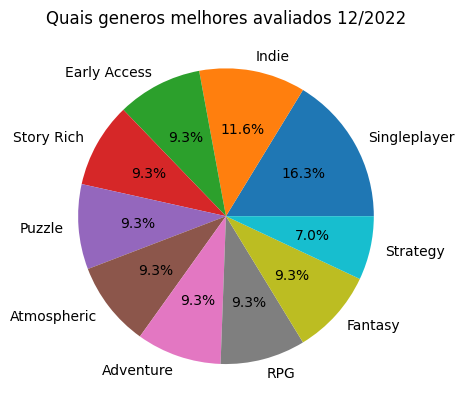

In [75]:
#10 jogos com as críticas mais positivas ajudará a dar uma ideia dos jogos que são quase universalmente adorados pelos jogadores
gamesdf = selecao_jogos_dz_2022.merge(selecao_metadata_dz_2022, on='jogo_id')
gamesdf = gamesdf.sort_values('feedback_positivo', ascending=False)
positivedf = gamesdf.head(10)
tags = positivedf['tags']
count_list = []
for i in tags:
    for j in i:
        count_list.append(j)

sorted_tags = pd.value_counts(np.array(count_list))
sorted_tags = sorted_tags.sort_values(ascending=False)
print("Quantidade de generos ", sorted_tags.size)
print("Media de generos parecidos ", sorted_tags.mean())  

# Create a chart to help us see our results
tag_slice = sorted_tags.head(10)
labels = tag_slice.keys()

fig, ax = plt.subplots()
plt.title('Quais generos melhores avaliados 12/2022')
pchart = ax.pie(tag_slice, labels = labels, autopct='%1.1f%%')

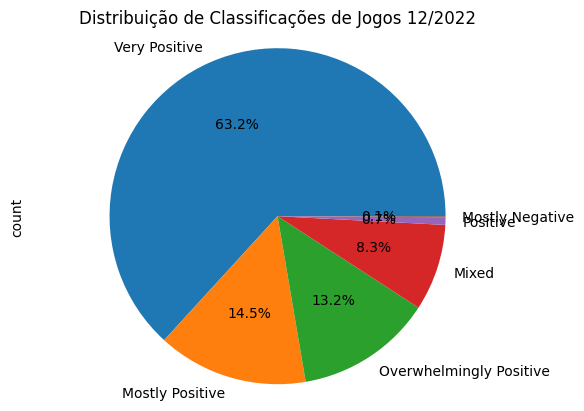

In [67]:
count_ratings = selecao_jogos_dz_2022['avaliacao'].value_counts()

# Visualização em um gráfico de pizza
count_ratings.plot(kind='pie', autopct='%1.1f%%')
plt.axis('equal')
plt.title('Distribuição de Classificações de Jogos 12/2022')
plt.show()

In [76]:
#10 Jogos mais populares que foram recomendados em 12/2022 com Avaliações Positivias (maior que 90)
game_data4=selecao_jogos_dz_2022.loc[(selecao_jogos_dz_2022['feedback_positivo']>=90)].sort_values(['qtd_avaliacoes','feedback_positivo'],ascending=[False,False]).head(10)
game_data4[['titulo','qtd_avaliacoes','feedback_positivo']]

,titulo,qtd_avaliacoes,feedback_positivo
905,Team Fortress 2,935635,93
696,Terraria,867226,97
270,Garry's Mod,795170,96
673,The Witcher® 3: Wild Hunt,640996,96
501,Among Us,575982,92
1518,Wallpaper Engine,572319,98
1609,Left 4 Dead 2,519066,97
410,Unturned,504808,91
860,ELDEN RING,481754,91
872,Stardew Valley,457664,98


In [77]:
#Top 10 Games Populares 2022  que foram recomendados em 12/2022, usuarios Windows
game_data3=selecao_jogos_dz_2022.loc[(selecao_jogos_dz_2022['data_lancamento'].dt.year==2022) & (selecao_jogos_dz_2022['feedback_positivo']>=90) & (selecao_jogos_dz_2022['win']==True)].sort_values(['qtd_avaliacoes','feedback_positivo'],ascending=[False,False]).head(10)
game_data3[['titulo','qtd_avaliacoes','feedback_positivo']]

,titulo,qtd_avaliacoes,feedback_positivo
860,ELDEN RING,481754,91
372,Raft,218598,93
283,Vampire Survivors,175903,98
183,Stray,101109,97
624,God of War,65968,97
1171,Teardown,60815,96
1092,Marvel’s Spider-Man Remastered,41232,96
747,Cult of the Lamb,40135,93
774,PowerWash Simulator,29465,97
983,LEGO® Star Wars™: The Skywalker Saga,28451,92


In [78]:
#Os 10 jogos com piores feedbacks com mais de 10000 avaliacoes
game_data5=selecao_jogos_dz_2022.loc[(selecao_jogos_dz_2022['feedback_positivo']<50) & (selecao_jogos_dz_2022['qtd_avaliacoes']>=1000) ].sort_values(['feedback_positivo'],ascending=[True]).head(10)
game_data5[['titulo','qtd_avaliacoes','feedback_positivo']]

,titulo,qtd_avaliacoes,feedback_positivo
276,eFootball™ 2023,48952,33
1059,Battlefield™ 2042,131182,35
473,DISSIDIA FINAL FANTASY NT Free Edition,3240,43
1683,MONOPOLY® PLUS,10236,44
510,New Gundam Breaker,1540,45
1736,ATLAS,35736,46
214,Silent Hill Homecoming,1553,47
282,A.V.A Global,6167,47
944,Torchlight III,9604,47
268,UNDECEMBER,14789,48


In [79]:
#Os 10 jogos com melhores feedbacks com mais de 10000 avaliacoes
game_data5=selecao_jogos_dz_2022.loc[(selecao_jogos_dz_2022['feedback_positivo']>90) & (selecao_jogos_dz_2022['qtd_avaliacoes']>=10000) ].sort_values(['feedback_positivo'],ascending=[False]).head(10)
game_data5[['titulo','qtd_avaliacoes','feedback_positivo']]

,titulo,qtd_avaliacoes,feedback_positivo
1084,Portal,104073,98
1403,Baba Is You,14808,98
765,Portal 2,267142,98
267,The Henry Stickmin Collection,33364,98
283,Vampire Survivors,175903,98
1081,OMORI,47297,98
858,ULTRAKILL,47314,98
1518,Wallpaper Engine,572319,98
872,Stardew Valley,457664,98
1093,A Hat in Time,36782,98
